In [222]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Q3

In [232]:
def fashion_prepare_train_data():
    data_fashion_mnist = pd.read_csv('fashion-mnist_train.csv',sep=',')
    data_fashion_mnist = np.array(data_fashion_mnist)
    #data_fashion_mnist = data_fashion_mnist[:3310,:]

    X_train = data_fashion_mnist[:,1:]
    y_train = data_fashion_mnist[:,0]

    b = np.zeros((y_train.size, y_train.max()+1))
    b[np.arange(y_train.size),y_train] = 1
    y_train = b

    X_train = X_train.T
    y_train = y_train.T

    X_train = X_train / 255.
    
    return X_train, y_train

In [233]:
def fashion_prepare_test_data():
    data_fashion_mnist = pd.read_csv('fashion-mnist_test.csv',sep=',')
    data_fashion_mnist = np.array(data_fashion_mnist)
    #data_fashion_mnist = data_fashion_mnist[:3310,:]

    X_test = data_fashion_mnist[:,1:]
    y_test = data_fashion_mnist[:,0]

    b = np.zeros((y_test.size, y_test.max()+1))
    b[np.arange(y_test.size),y_test] = 1
    y_test = b

    X_test = X_test.T
    y_test = y_test.T

    X_test = X_test / 255.
    
    return X_test, y_test

In [193]:
def pendigits_prepare_data():
    pendigits = pd.read_csv('pendigits.tra',sep=",",header=None)
    pendigits = np.array(pendigits)
    #data_fashion_mnist = data_fashion_mnist[:3310,:]
    
    np.random.shuffle(pendigits)
    
    train = pendigits[:round(pendigits.shape[0]*0.6),:]
    test = pendigits[round(pendigits.shape[0]*0.6):,:]
    
    X_train = train[:,:-1]
    y_train = train[:,-1]
    X_test = test[:,:-1]
    y_test = test[:,-1]
    
    b = np.zeros((y_train.size, y_train.max()+1))
    b[np.arange(y_train.size),y_train] = 1
    y_train = b
    
    b = np.zeros((y_test.size, y_test.max()+1))
    b[np.arange(y_test.size),y_test] = 1
    y_test = b
    
    X_train = X_train.T
    y_train = y_train.T
    X_test = X_test.T
    y_test = y_test.T
    
    X_train = X_train / 255.
    X_test = X_test / 255.
    
    return X_train, y_train, X_test, y_test

In [25]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [239]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.1
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_h, n_h)*0.1
    b2 = np.zeros((n_h, 1))
    
    w3 = np.random.randn(n_h, n_h)*0.1
    b3 = np.zeros((n_h, 1))
    
    w4 = np.random.randn(n_y, n_h)*0.1
    b4 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2,
        "w3" : w3,
        "b3" : b3,
        "w4" : w4,
        "b4" : b4
    }
    
    return parameters

In [240]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    w3 = parameters['w3']
    b3 = parameters['b3']
    w4 = parameters['w4']
    b4 = parameters['b4']
    
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = tanh(z2)
    
    z3 = np.dot(w3, a2) + b3
    a3 = tanh(z3)
    
    z4 = np.dot(w4, a3) + b4
    a4 = softmax(z4)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2,
        "z3" : z3,
        "a3" : a3,
        "z4" : z4,
        "a4" : a4
    }
    
    return forward_cache

In [241]:
#def cost_function(a4, y):
 #   m = y.shape[1]
    
  #  cost = -(1/m)*np.sum(y*np.log(a4))
    
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))
    
   # return cost

In [242]:
def cost_function(predictions, targets):
    N = predictions.shape[0]
    ce = -np.sum(targets * np.log(predictions)) / N
    return ce

In [243]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    w3 = parameters['w3']
    b3 = parameters['b3']
    w4 = parameters['w4']
    b4 = parameters['b4']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    a3 = forward_cache['a3']
    a4 = forward_cache['a4']
    
    m = x.shape[1]
    
    dz4 = (a4 - y)
    dw4 = (1/m)*np.dot(dz4, a3.T)
    db4 = (1/m)*np.sum(dz4, axis = 1, keepdims = True)
    
    dz3 = (1/m)*np.dot(w4.T, dz4)*derivative_tanh(a3)
    dw3 = (1/m)*np.dot(dz3, a2.T)
    db3 = (1/m)*np.sum(dz3, axis = 1, keepdims = True)

    dz2 = (1/m)*np.dot(w3.T, dz3)*derivative_tanh(a2)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2,
        "dw3" : dw3,
        "db3" : db3,
        "dw4" : dw4,
        "db4" : db4
    }
    
    return gradients

In [244]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    w3 = parameters['w3']
    b3 = parameters['b3']
    w4 = parameters['w4']
    b4 = parameters['b4']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    dw3 = gradients['dw3']
    db3 = gradients['db3']
    dw4 = gradients['dw4']
    db4 = gradients['db4']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    w3 = w3 - learning_rate*dw3
    b3 = b3 - learning_rate*db3
    w4 = w4 - learning_rate*dw4
    b4 = b4 - learning_rate*db4
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2,
        "w3" : w3,
        "b3" : b3,
        "w4" : w4,
        "b4" : b4
    }
    
    return parameters

In [248]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    accuracy_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        cost = cost_function(forward_cache['a4'], y)
        gradients = backward_prop(x, y, parameters, forward_cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        cost_list.append(cost)
        accuracy_list.append(accuracy(X_train, y_train, parameters))

        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
            
        
    return parameters, cost_list, accuracy_list

In [ ]:
def compute_confusion_matrix(true, pred):
    
    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

In [280]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) 
    plt.colorbar()

In [251]:
iterations = 100
n_h = 128
learning_rate = 0.1

X_train,y_train = fashion_prepare_train_data()
X_test,y_test = fashion_prepare_test_data()

Parameters, Cost_list, Accuracy_list = model(X_train, y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 14330.931352924916
Cost after 10 iterations is : 12005.491748458397
Cost after 20 iterations is : 10665.000710442826
Cost after 30 iterations is : 9686.765114944646
Cost after 40 iterations is : 8953.98975337164
Cost after 50 iterations is : 8389.92322649964
Cost after 60 iterations is : 7944.478850138262
Cost after 70 iterations is : 7584.737304183756
Cost after 80 iterations is : 7288.543254741018
Cost after 90 iterations is : 7040.575789669005


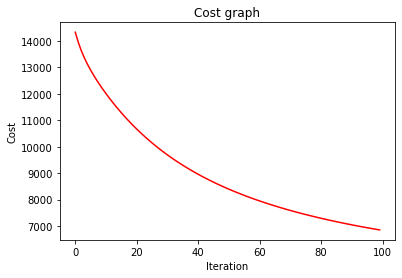

In [256]:
# data to be plotted
x = np.arange(100)
y = Cost_list
 
# plotting
plt.title("Cost graph")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.plot(x, y, color ="red")
plt.show()

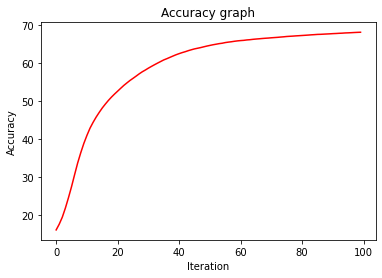

In [257]:
# data to be plotted
x = np.arange(100)
y = Accuracy_list
 
# plotting
plt.title("Accuracy graph")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(x, y, color ="red")
plt.show()

In [261]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [273]:
w1 = Parameters['w1']
b1 = Parameters['b1']
w2 = Parameters['w2']
b2 = Parameters['b2']
w3 = Parameters['w3']
b3 = Parameters['b3']
w4 = Parameters['w4']
b4 = Parameters['b4']

z1 = np.dot(w1, X_test) + b1
a1 = tanh(z1)

z2 = np.dot(w2, a1) + b2
a2 = tanh(z2)

z3 = np.dot(w3, a2) + b3
a3 = tanh(z3)

z4 = np.dot(w4, a3) + b4
a4 = softmax(z4)

In [282]:
cm_array = compute_confusion_matrix(np.argmax(y_test,axis=0), np.argmax(a4,axis=0))
cm_array

array([[772.,   9.,  23., 114.,  21.,   1.,  29.,   3.,  23.,   5.],
       [ 39., 878.,  19.,  51.,   6.,   0.,   4.,   0.,   2.,   1.],
       [ 29.,   2., 548.,  10., 330.,   1.,  52.,   2.,  24.,   2.],
       [ 41.,  63.,  14., 827.,  31.,   0.,   9.,   0.,  15.,   0.],
       [ 15.,  17., 240.,  84., 564.,   0.,  65.,   2.,  11.,   2.],
       [  9.,   0.,   2.,   4.,   5., 427.,   9., 278.,  59., 207.],
       [226.,   9., 176.,  78., 223.,   2., 244.,   0.,  38.,   4.],
       [  0.,   0.,   0.,   0.,   0.,  43.,   0., 813.,   1., 143.],
       [ 11.,   0.,  29.,  40.,  24.,  19.,  11.,  19., 833.,  14.],
       [  0.,   0.,   0.,   2.,   1.,   7.,   1.,  44.,  12., 933.]])

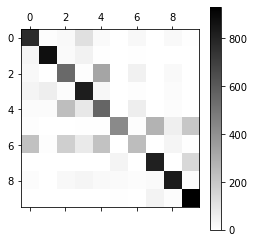

In [283]:
plot_confusion_matrix(cm_array)

# Q2

In [144]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(3, n_h)*0.01
    b2 = np.zeros((3, 1))
    
    w3 = np.random.randn(n_h, 3)*0.01
    b3 = np.zeros((n_h, 1))
    
    w4 = np.random.randn(n_x, n_h)*0.01
    b4 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2,
        "w3" : w3,
        "b3" : b3,
        "w4" : w4,
        "b4" : b4
    }
    
    return parameters

def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    w3 = parameters['w3']
    b3 = parameters['b3']
    w4 = parameters['w4']
    b4 = parameters['b4']
    
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = tanh(z2)
    
    z3 = np.dot(w3, a2) + b3
    a3 = tanh(z3)
    
    z4 = np.dot(w4, a3) + b4
    a4 = softmax(z4)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2,
        "z3" : z3,
        "a3" : a3,
        "z4" : z4,
        "a4" : a4
    }
    
    return forward_cache

def cost_function(predictions, targets):
    return np.square(np.subtract(predictions, targets)).mean()

def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    w3 = parameters['w3']
    b3 = parameters['b3']
    w4 = parameters['w4']
    b4 = parameters['b4']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    a3 = forward_cache['a3']
    a4 = forward_cache['a4']
    
    m = x.shape[1]
    
    dz4 = (a4 - y)
    dw4 = (1/m)*np.dot(dz4, a3.T)
    db4 = (1/m)*np.sum(dz4, axis = 1, keepdims = True)
    
    dz3 = (1/m)*np.dot(w4.T, dz4)*derivative_tanh(a3)
    dw3 = (1/m)*np.dot(dz3, a2.T)
    db3 = (1/m)*np.sum(dz3, axis = 1, keepdims = True)

    dz2 = (1/m)*np.dot(w3.T, dz3)*derivative_tanh(a2)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2,
        "dw3" : dw3,
        "db3" : db3,
        "dw4" : dw4,
        "db4" : db4
    }
    
    return gradients

def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    w3 = parameters['w3']
    b3 = parameters['b3']
    w4 = parameters['w4']
    b4 = parameters['b4']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    dw3 = gradients['dw3']
    db3 = gradients['db3']
    dw4 = gradients['dw4']
    db4 = gradients['db4']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    w3 = w3 - learning_rate*dw3
    b3 = b3 - learning_rate*db3
    w4 = w4 - learning_rate*dw4
    b4 = b4 - learning_rate*db4
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2,
        "w3" : w3,
        "b3" : b3,
        "w4" : w4,
        "b4" : b4
    }
    
    return parameters

In [145]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        cost = cost_function(forward_cache['a4'], y)
        gradients = backward_prop(x, y, parameters, forward_cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [234]:
iterations = 100
n_h = 128
learning_rate = 0.1

X_train,y_train = fashion_prepare_train_data()
X_test,y_test = fashion_prepare_test_data()

Parameters, Cost_list = model(X_train, X_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 0.20560445593022936
Cost after 10 iterations is : 0.20543503033988783
Cost after 20 iterations is : 0.2052874273475048
Cost after 30 iterations is : 0.2051712100515691
Cost after 40 iterations is : 0.20508453433283202
Cost after 50 iterations is : 0.20502100373068768
Cost after 60 iterations is : 0.20497423082370875
Cost after 70 iterations is : 0.20493928985042592
Cost after 80 iterations is : 0.20491271310481818
Cost after 90 iterations is : 0.2048921236578907


In [235]:
w1 = Parameters['w1']
b1 = Parameters['b1']
w2 = Parameters['w2']
b2 = Parameters['b2']
w3 = Parameters['w3']
b3 = Parameters['b3']
w4 = Parameters['w4']
b4 = Parameters['b4']

z1 = np.dot(w1, X_train) + b1
a1 = tanh(z1)

z2 = np.dot(w2, a1) + b2
a2 = tanh(z2)

In [236]:
data_fashion_mnist = pd.read_csv('fashion-mnist_train.csv',sep=',')
data_fashion_mnist = np.array(data_fashion_mnist)
y_train = data_fashion_mnist[:,0]
y_train = y_train.T

<ipython-input-237-7f55b4367cc1>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


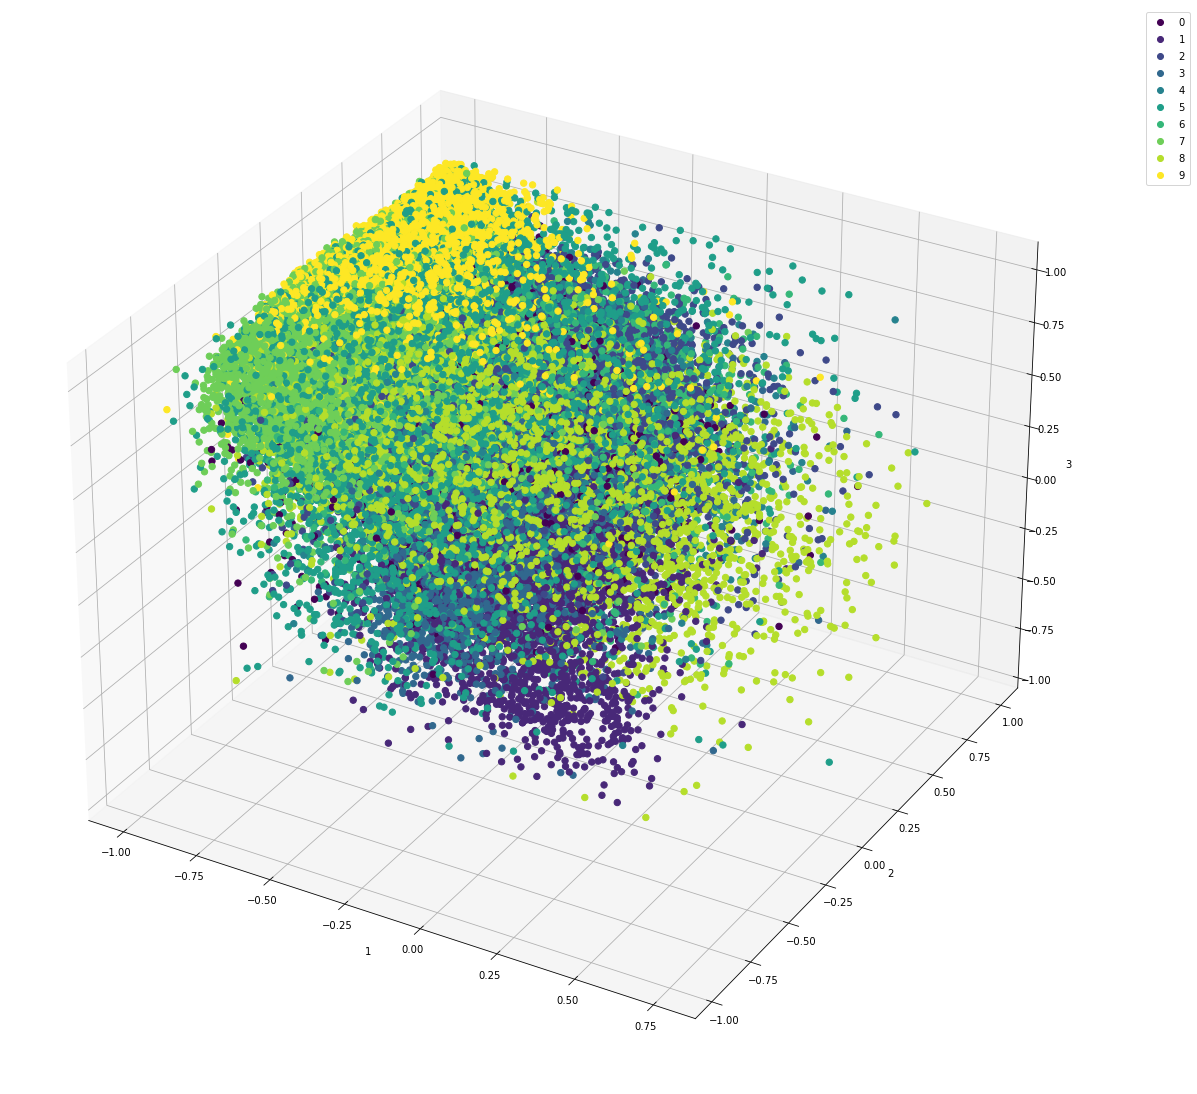

In [237]:
# axes instance
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
fig.add_axes(ax)

# plot
sc = ax.scatter(a2.T[:,0], a2.T[:,1], a2.T[:,2], s=40, c=y_train, marker='o', cmap=plt.cm.get_cmap('viridis',10), alpha=1)
ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

## Pendigits

In [200]:
X_train, y_train, X_test, y_test = pendigits_prepare_data()
Parameters, Cost_list = model(X_train, X_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 0.036988958678825214
Cost after 10 iterations is : 0.036493549066340066
Cost after 20 iterations is : 0.036041535228262755
Cost after 30 iterations is : 0.035634746713616
Cost after 40 iterations is : 0.035273578171012315
Cost after 50 iterations is : 0.034956941512556475
Cost after 60 iterations is : 0.034682445093899526
Cost after 70 iterations is : 0.03444671689391764
Cost after 80 iterations is : 0.03424578073108716
Cost after 90 iterations is : 0.03407541176115332


In [202]:
w1 = Parameters['w1']
b1 = Parameters['b1']
w2 = Parameters['w2']
b2 = Parameters['b2']
w3 = Parameters['w3']
b3 = Parameters['b3']
w4 = Parameters['w4']
b4 = Parameters['b4']

In [209]:
z1 = np.dot(w1, X_train) + b1
a1 = tanh(z1)

z2 = np.dot(w2, a1) + b2
a2 = tanh(z2)

In [224]:
train = pendigits[:round(pendigits.shape[0]*0.6),:]
y_train = train[:,-1]

<ipython-input-230-2bea1004ce86>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


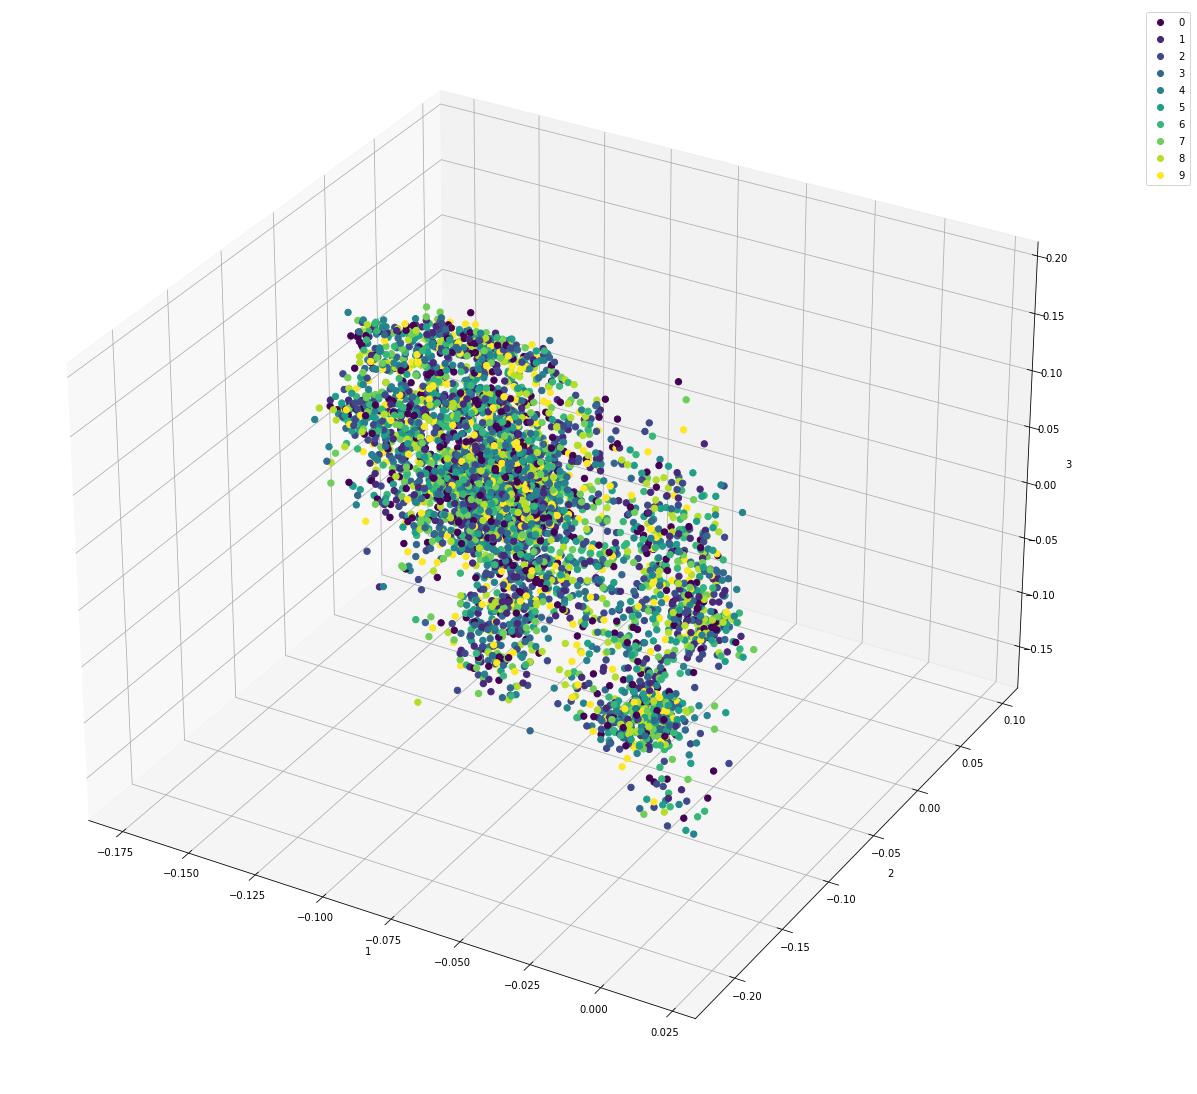

In [230]:
# axes instance
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
fig.add_axes(ax)

# plot
sc = ax.scatter(a2.T[:,0], a2.T[:,1], a2.T[:,2], s=40, c=y_train, marker='o', cmap=plt.cm.get_cmap('viridis',10), alpha=1)
ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)